<center>
<H1> Nombres: </H1>    
</center>

- __Nombre y cédula del integrante 1 del grupo:__ juan Camilo Ruiz Herrera(**1001420630**)

- __Nombre y cédula del integrante 2 del grupo:__ Sebastian Restrepo Betancur(**1001420630**)

<center>
    <img src="https://blogs.elespectador.com/wp-content/uploads/2017/09/logo-Universidad-Nacional.png" width="500" alt="logo" />
</center>

# Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Parcial 2-Enunciados](#0)<br>
2.  [Bibliotecas necesarias](#lib)<br>
3.  [Solución literal 1](#2) <br>
    3.1. [Analisis bases de datos](#bd) <br>
    3.2. [Analisis de ACF y PACF](#bd12) <br>
    ...3.2.1 [Analisis serie 1](#bd121)     
    ...3.2.2 [Analisis serie 2](#bd122)    
    ...3.2.3 [Analisis serie 3](#bd123)     
4.  [Solución literal 2](#segundo) <br>
5.  [Solución literal 3](#tercero) <br>
    5.1.  [Análisis serie 1](#tercero1) <br>
    5.2.  [Análisis serie 2](#tercero2) <br>
    5.3.  [Análisis serie 3](#tercero3) <br>
6.  [Solución literal 4](#cuarto) <br>
7.  [Solución literal 5](#cinco) <br>
    7.1.  [Análisis serie 1](#cinco1) <br>
    7.2.  [Análisis serie 2](#cinco2) <br>
    7.3.  [Análisis serie 3](#cinco3) <br>
8.  [Solución literal 6](#seis) <br>
    8.1.  [Análisis serie 1](#seis1) <br>
    8.2.  [Análisis serie 2](#seis2) <br>
    8.3.  [Análisis serie 3](#seis3) <br>
9.  [Solución literal 7](#siete) <br>
10. [Solución literal 8](#ocho) <br>
    10.1. [Ilustración serie 1](#ocho1) <br>
    10.2. [Ilustración serie 2](#ocho2) <br>
    10.3. [Ilustración serie 3](#ocho3) <br>
11. [Autores](#autor) <br>
    
</div>

# Parcial 2 -  Enunciados<a id="0"></a>


Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

# Bibliotecas necesarias<a id="lib"></a>

In [1]:
# Bibliotecas extra:
# !pip install IPython
# !pip install plotly
# Bibliotecas necesarios:
import numpy as np # Para trabajar con vectores y matrices
from matplotlib import pyplot as plt # Para graficar
import pandas as pd # Para trabajar con bases de datos
import seaborn as sns # Mejores Graficos
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from IPython.display import display, HTML # Para varias salidas en data_frame y código
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos
# Funciones auxiliar: Permite esconder el codigo, Permite varias salidas DF/ No correr en VSC
def Boton_auxiliar(button_id):
    from IPython.display import display_html
    my_html = '''
    <center>
    <button type="button" id="%s" onclick="code_toggle('%s')">Ver código</button>
    </center>
    <script>
    function code_toggle(my_id) {
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)
def salidas(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
Boton_auxiliar("nombre")


Ver código

# Solución literal 1<a id="2"></a>

A contintinuación inicialmente se pretende hacer un análisis de las series de tiempo, detallando de manera visual el comportamiento de las mismas, junto se mostrará el summary y los códigos; para más información de los datos utilizados para la serie de tiempo se encuentra a continuación en el siguiente Link del codigo junto con la implementación del mismo notebook[(Github)](https://www.datos.gov.co/Minas-y-Energ-a/Superservicios-Informaci-n-de-Accidentes-de-Origen/es62-3x6p).

In [59]:
# Lectura de base de datos:
Boton_auxiliar("BD")
serie_1 = pd.read_excel("datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
serie_2 = pd.read_excel("datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
serie_3 = pd.read_excel("datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

Ver código

## Análisis Base de datos<a id="bd"></a>

primeramente es importante leer la base de datos, para ello se debe mirar el orden en que estos están presentados, los cuales cuentan con 3 series de tiempo distribuidas de la siguiente manera:

| BD_de_series |        Filas      |     Columnas    |
| ------------ | :---------------: | --------------: |
| Serie_1      |  231              |        2        |
| Serie_2      |  521              |        2        |
| Serie_3      | 837               |        2        |

a continuación se muestra el resultado de las 3 bases junto a la depuración, limpieza y orden de la misma información:

In [60]:
# Encabezados
Boton_auxiliar("BD1")
# validación de la base de datos componentes
# serie_1.dtypes,serie_2.dtypes,serie_3.dtypes 
# serie_1.shape,serie_2.shape,serie_3.shape
serie_2.rename(columns={"date":"fecha","value":"valor"},inplace=True)
serie_3.rename(columns={"dia":"fecha","registro":"valor"},inplace=True)
# ordenar por fechas:
serie_1.sort_values(by="fecha",inplace=True)
serie_2.sort_values(by="fecha",inplace=True)
serie_3.sort_values(by="fecha",inplace=True)
# Ordenar indices:
serie_1.set_index("fecha",inplace=True)
serie_2.set_index("fecha",inplace=True)
serie_3.set_index("fecha",inplace=True)
salidas([serie_1.head(), serie_2.head(), serie_3.head()], ['Base de datos serie 1:', 'Base de datos serie 2:', 'Base de datos serie 3:'])

Ver código

,valor
fecha,
2021-01-01 00:00:00,0.060000
2021-01-02 00:00:00,0.050000
2021-01-03 00:00:00,0.050000
2021-01-04 00:00:00,0.510000
2021-01-05 00:00:00,2.030000
,valor
fecha,
2020-01-01 00:00:00,-0.890000
2020-01-02 00:00:00,-0.990000


junto ademas podemos ver una descripción de la variable valor obtenida por la serie:

In [22]:
Boton_auxiliar("BD4")
# Calculo NA´s
# serie_1.isnull().sum(),serie_2.isnull().sum(),serie_3.isnull().sum()
salidas([serie_1.describe(), serie_2.describe(), serie_3.describe()],
        ['Descripcion base de datos serie 1:', 'Descripcion Base de datos serie 2:', 'Descripcion Base de datos serie 3:'])

Ver código

,valor
count,231.000000
mean,-1.039134
std,7.274057
min,-13.830000
25%,-5.835000
50%,-2.430000
75%,3.075000
max,22.600000
,valor
count,521.000000


Continuando con el proceso anterior una manera mas detallada de comprender la información del mismo es bajo las siguientes series temporales de los datos, en donde se pueden interactuar con las mismas

In [23]:
fig = go.Figure(data=go.Scatter(x=serie_1.index, y=serie_1["valor"], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Serie de tiempo 1', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafico1")

Ver código

Continuando la siguiente es la realización del serie de tiempo 2:

In [24]:
fig = go.Figure(data=go.Scatter(x=serie_2.index, y=serie_2["valor"], mode='lines', marker=dict(color='blue')))
fig.update_layout(title='Serie de tiempo 2', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafico2")

Ver código

Continuando la siguiente es la realización del serie de tiempo 3:

In [25]:
fig = go.Figure(data=go.Scatter(x=serie_3.index, y=serie_3["valor"], mode='lines', marker=dict(color='orange')))
fig.update_layout(title='Serie de tiempo 3', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafico3")

Ver código

## Análisis de ACF y PACF <a id="bd12"></a>

### Analisis serie 1:<a id="bd121"></a>

Primeramente se mostrara el resultado obtenido por las **ACF y PACf** muestrales que ayuden a interpretar la información detallada en el grafico de la serie 1

Ver código

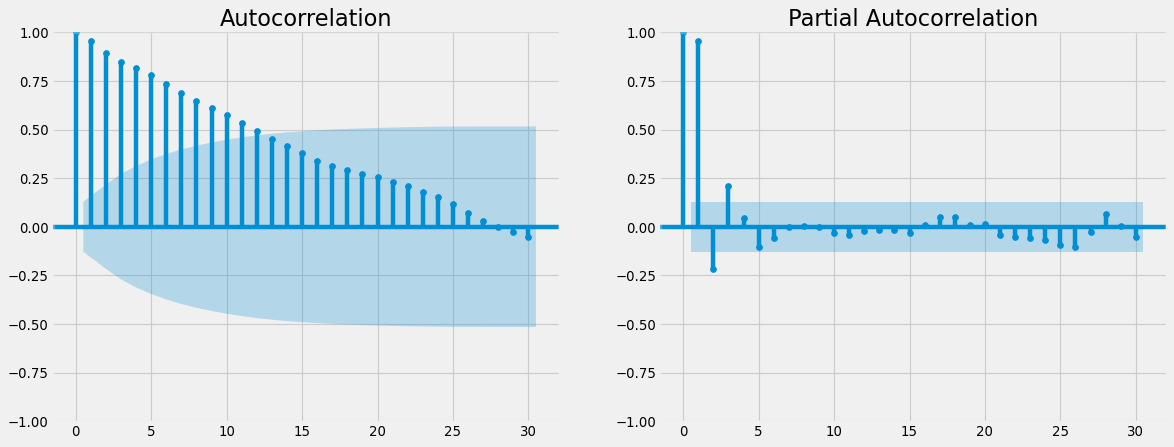

In [26]:
Boton_auxiliar("grafico12")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(serie_1.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_1.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Dado que tiene un decaimiento exponencial en el **ACF y el PACF** tiene un corte en el lag 3, igual de significativo que el lag 2, por indicar el modelo mas simple, se escoge el p=2. Podria tener una diferencia igual a 1, ya que indica autocorrelaciones altas hasta el lag 10, esto se confirmará con el test de Dickey-Fuller para ver la estacionariedad. Se propone un ARIMA(2,1,0).

### Analisis serie 2:<a id="bd122"></a>

Primeramente se mostrara el resultado obtenido por las **ACF y PACf** muestrales que ayuden a interpretar la información detallada en el grafico de la serie 2:

Ver código

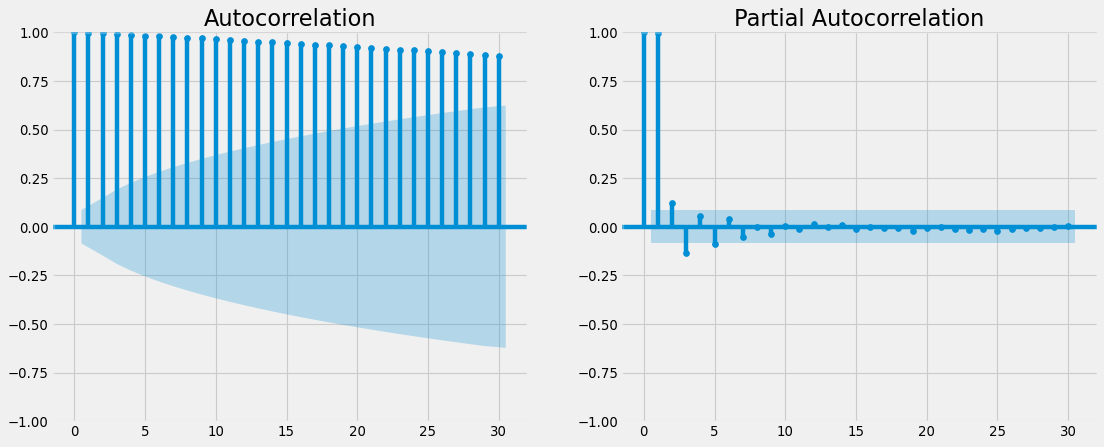

In [27]:
Boton_auxiliar("grafico13")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), dpi= 80)
plot_acf(serie_2.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_2.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Alta correlación en el **ACF** con decaimiento lento y un corte drástico en el **PACF** en el lag número 1, con lags poco significativos como el 2 y el 3. Dado a la alta correlación se puede decir que hay tendencia, podria proponerse una diferencia igual a 1, esto se confirmará con el test de Dickey-Fuller para ver la estacionariedad. Se propone un ARIMA(1,1,0)

### Analisis serie 3:<a id="bd123"></a>

Primeramente se mostrara el resultado obtenido por las **ACF y PACf** muestrales que ayuden a interpretar la información detallada en el grafico de la serie 2:

Ver código

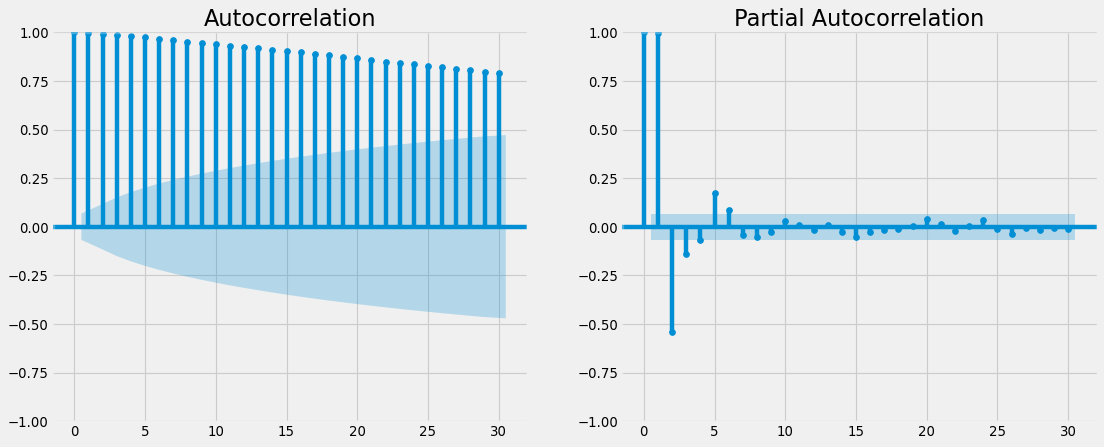

In [28]:
Boton_auxiliar("grafico133")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), dpi= 80)
plot_acf(serie_3.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_3.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Se evidencia en **el ACF y PACF** una corte desde el principio, esto no indica nada. Se propone hacer 3 modelos para ver cual resultaria mejor. ARIMA(0,0,1),ARIMA(1,0,0),ARIMA(1,0,1), y como no hay correlación alta en ACF se confirmará en la prueba Dickey-Fuller que diferencia se podría tener.

# Solución literal 2<a id="segundo"></a>

A continuación se presentara el resultado de las 3 series para cada uno de los **Test de Dickey-Fuller** hasta encontrar la diferenciación más optima de la serie de tiempo:

In [29]:
Boton_auxiliar("grafico136")
# Construcción de presentación
# Serie 1
salida= pd.DataFrame()
diff=[0,1]
T_estad=[adfuller(serie_1.valor)[0],adfuller(serie_1.valor.diff().dropna())[0]]
p_valor=[adfuller(serie_1.valor)[1],adfuller(serie_1.valor.diff().dropna())[1]]
salida["diferenciación(d)"]=diff
salida["P-valor"]=p_valor
salida["T_estadistico"]=T_estad
# Serie 2
salida1= pd.DataFrame()
diff1=[0,1]
T_estad1=[adfuller(serie_2.valor)[0],adfuller(serie_2.valor.diff().dropna())[0]]
p_valor1=[adfuller(serie_2.valor)[1],adfuller(serie_2.valor.diff().dropna())[1]]
salida1["diferenciación(d)"]=diff1
salida1["P-valor"]=p_valor1
salida1["T_estadistico"]=T_estad1
# serie 3
salida2= pd.DataFrame()
diff2=[0,1]
T_estad2=[adfuller(serie_3.valor)[0],adfuller(serie_3.valor.diff().dropna())[0]]
p_valor2=[adfuller(serie_3.valor)[1],adfuller(serie_3.valor.diff().dropna())[1]]
salida2["diferenciación(d)"]=diff2
salida2["P-valor"]=p_valor2
salida2["T_estadistico"]=T_estad2
salida.set_index("diferenciación(d)",inplace=True)
salida1.set_index("diferenciación(d)",inplace=True)
salida2.set_index("diferenciación(d)",inplace=True)
salidas([salida,salida1,salida2],
        ['Test de Dickey Fuller:serie 1', 'Test de Dickey Fuller:serie 2', 'Test de Dickey Fuller:serie 3'])

Ver código

,P-valor,T_estadistico
diferenciación(d),,
0,0.848287,-0.694041
1,0.000000,-6.904973
,P-valor,T_estadistico
diferenciación(d),,
0,0.940538,-0.182826
1,0.000000,-7.524056
,P-valor,T_estadistico
diferenciación(d),,
0,0.521334,-1.524550


En los siguientes literales se interpretaran cada uno de los resultados obtenidos por arrojados por el Test:

- **Interpretación serie 1:** En general se confirma la no estacionariedad de la serie para la diferenciación de orden 0, por lo tanto se le indica una diferencia de 1 para confirmar estacionariedad.
- **Interpretación serie 2:** En general se confirma la no estacionariedad de la serie para la diferenciación de orden 0, por lo tanto se le indica una diferencia de 1 para confirmar estacionariedad.
- **Interpretación serie 3:** En general se confirma la no estacionariedad de la serie para la diferenciación de orden 0, por lo tanto se le indica una diferencia de 1 para confirmar estacionariedad.

**Nota:** Los resultados del P_valor cogen valores muy pequeños y por aproximación el data.frame los aproxima a cero aunque los mismos no lo sean.

Finalmente para cada una de nuestras series concluimos que los mas recomendable es utilizar una **diferenciación de orden 1**.

# Solución literal 3<a id="tercero"></a>

Como se menciono en anteriores puntos lo mas recomendable es realizar una diferenciación de orden 1, para ello se mostrara tanto la serie como las ACF y PACF
$$\vartriangle X_t=X_t-X_{t-1}=(1-B)X_t$$

## Analisis Serie 1:<a id="tercero"></a>

A continuación se ve las serie junto en la parte inferior con las repectivas ACF y PACF obtenidas:

In [30]:
serie_1_diferenciado=pd.DataFrame(serie_1.valor.diff().dropna())
fig = go.Figure(data=go.Scatter(x=serie_1_diferenciado.index, y=serie_1_diferenciado["valor"], mode='lines',
                                marker=dict(color='red')))
fig.update_layout(title='Serie de tiempo 1 diferenciada', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafic1")

Ver código

Vemos que ya la serie empieza a tener un comportamiento mas estacional

Ver código

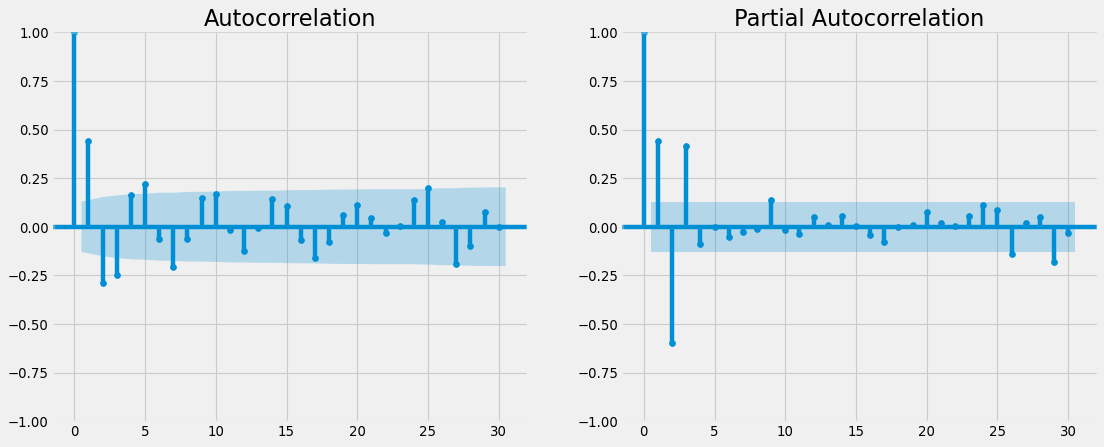

In [31]:
Boton_auxiliar("grafico135")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), dpi= 80)
plot_acf(serie_1_diferenciado.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_1_diferenciado.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Dado que los graficos ya están diferenciados ocurre un proceso similar a hallar un modelo ARMA(p,q), AR(P) y MA(q), inicialmente se nota un decaimiento sinusoidal en **ACF** con un corte significativo en el lag 1,2 y 3 para la **PACF**. Se evidencia un modelo tipo ARIMA(1,1,0), ARIMA(2,1,0) Y ARIMA(3,1,0), más adelante se probará el mejor modelo.

## Analisis Serie 2:<a id="tercero2"></a>

A continuación se ve las serie junto en la parte inferior con las repectivas ACF y PACF obtenidas:

In [32]:
serie_2_diferenciado=pd.DataFrame(serie_2.valor.diff().dropna())
fig = go.Figure(data=go.Scatter(x=serie_2_diferenciado.index, y=serie_2_diferenciado["valor"], mode='lines',
                                marker=dict(color='darksalmon')))
fig.update_layout(title='Serie de tiempo 2 diferenciada', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafic2")

Ver código

de igual manera vemos que ya la serie empieza a tener un comportamiento mas estacional

Ver código

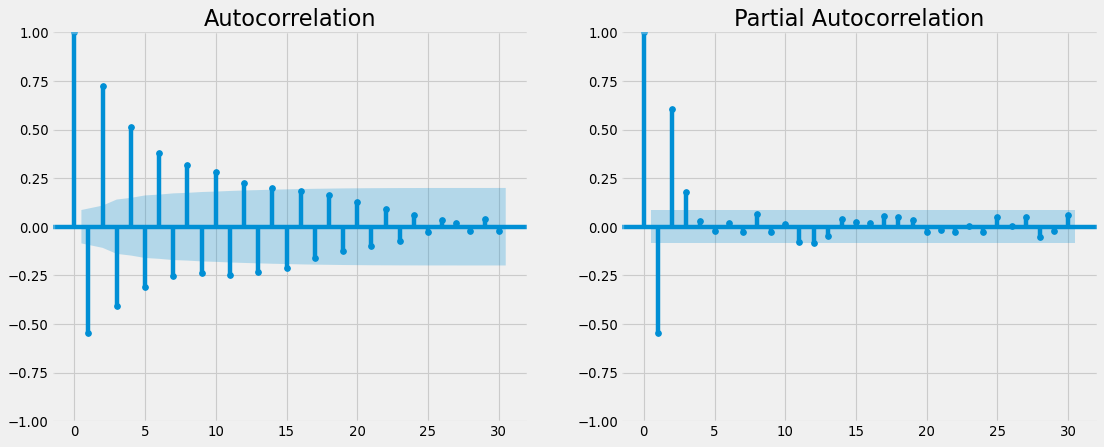

In [33]:
Boton_auxiliar("grafico1361")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), dpi= 80)
plot_acf(serie_2_diferenciado.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_2_diferenciado.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Decaimiento sinusoidal en **ACF** y un corte significativo en el lag 1,2 o 3 en la **PACF**. Se evidencia un modelo tipo ARIMA(1,1,0),  ARIMA(2,1,0),ARIMA(2,1,1),ARIMA(3,1,0),ARIMA(3,1,1), donde de probará el mejor modelo más adelante.

## Analisis Serie 3:<a id="tercero3"></a>

A continuación se ve la serie 3 junto en la parte inferior con las repectivas ACF y PACF obtenidas:

In [34]:
serie_3_diferenciado=pd.DataFrame(serie_3.valor.diff().dropna())
fig = go.Figure(data=go.Scatter(x=serie_3_diferenciado.index, y=serie_3_diferenciado["valor"], mode='lines',
                                marker=dict(color='lightblue')))
fig.update_layout(title='Serie de tiempo 3 diferenciada', xaxis_title='Fechas', yaxis_title='Valores obtenidos')
fig.show()
Boton_auxiliar("grafic3")

Ver código

Al igual que en anteriores series se logra ver un comportamiento estacional logrado gracias al test de dickey Fuler

Ver código

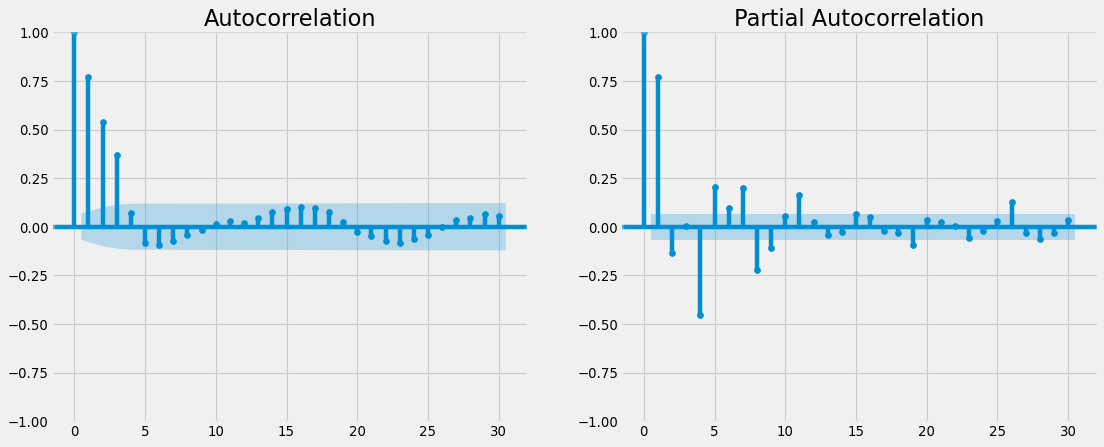

In [35]:
Boton_auxiliar("grafico13615")
# Dibujar Plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6), dpi= 80)
plot_acf(serie_3_diferenciado.valor.tolist(), ax=ax1, lags=30)
plot_pacf(serie_3_diferenciado.valor.tolist(), ax=ax2, lags=30, method="ywm")
# Arreglar bordes
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# Arreglar parametros
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

Decaimineto sinusoidal en **ACF** a partir del lag igual a 3 y de igual manera un **PACF** sinoidalmente que es dificil la interprestación esto debido a diferentes lags que salen y no salen dentro del mismo, por lo cuál se plantea diferentes Arimas por lo complejo de la serie de entender, proponemos varios modelos que van ARIMA(3,1,1), ARIMA(4,1,0),ARIMA(4,1,1),ARIMA(5,1,0), ARIMA(5,1,1) y ARIMA(5,1,2); esto debido a lo dificil que se convierte los lags en entenderse como se logra ver en la imagen, lo ideal en si por los lags es utilizar uno muy grande pero para esta clase de modelos entre mas simples mucho mejor por eso se intento elegir hasta un $P,q<5$ y luego se es necesario utilizar prueba y error.

# Solución literal 4<a id="cuarto"></a>

A continuación mostraremos diferentes tablas que presentan el **AIC y BIC** de los ARIMA anteriormente mencionados, y la cuál se hara una interpretación tomando en especifico el **BIC**, esto debido a que el mismo penaliza mas por parametros, de igual manera se dejara el AIC para la toma de desiciones:

In [61]:
Boton_auxiliar("grafi25")
# Primero correr arriba 
serie_1.valor.index = pd.DatetimeIndex(serie_1.valor.index).to_period('D')
serie_2.valor.index = pd.DatetimeIndex(serie_2.valor.index).to_period('D')
serie_3.valor.index = pd.DatetimeIndex(serie_3.valor.index).to_period('D')
# Modelos propuestos
modelo2_1 = ARIMA(serie_1.valor, order=(1,1,0)).fit()
modelo2_2 = ARIMA(serie_1.valor, order=(2,1,0)).fit()
modelo2_3 = ARIMA(serie_1.valor, order=(3,1,0)).fit()
modelo3_1 = ARIMA(serie_2.valor, order=(1,1,0)).fit()
modelo3_2 = ARIMA(serie_2.valor, order=(2,1,0)).fit()
modelo3_3 = ARIMA(serie_2.valor, order=(2,1,1)).fit()
modelo3_4 = ARIMA(serie_2.valor, order=(3,1,0)).fit()
modelo3_5 = ARIMA(serie_2.valor, order=(3,1,1)).fit()
modelo4_1 = ARIMA(serie_3.valor, order=(3,1,1)).fit()
modelo4_2 = ARIMA(serie_3.valor, order=(4,1,0)).fit()
modelo4_3 = ARIMA(serie_3.valor, order=(4,1,1)).fit()
modelo4_4 = ARIMA(serie_3.valor, order=(5,1,0)).fit()
modelo4_5 = ARIMA(serie_3.valor, order=(5,1,1)).fit()
modelo4_6 = ARIMA(serie_3.valor, order=(5,1,2)).fit()
## Resumen información:
tabla= pd.DataFrame()
tabla2= pd.DataFrame()
tabla3= pd.DataFrame()
# Tabla de información 1
arimas=["(1,1,0)","(2,1,0)","(3,1,0)"]
AIC=[modelo2_1.aic,modelo2_2.aic,modelo2_3.aic]
BIC=[modelo2_1.bic,modelo2_2.bic,modelo2_3.bic]
tabla["ARIMA"]=arimas
tabla["AIC"]=AIC
tabla["BIC"]=BIC
# Tabla de información 2
arimas1=["(1,1,0)","(2,1,0)","(2,1,1)","(3,1,0)","(3,1,1)"]
AIC1=[modelo3_1.aic,modelo3_2.aic,modelo3_3.aic,modelo3_4.aic,modelo3_5.aic]
BIC1=[modelo3_1.bic,modelo3_2.bic,modelo3_3.bic,modelo3_4.bic,modelo3_5.bic]
tabla2["ARIMA"]=arimas1
tabla2["AIC"]=AIC1
tabla2["BIC"]=BIC1
# Tabla de información 3
arimas2=["(3,1,1)","(4,1,0)","(4,1,1)","(5,1,0)","(5,1,1)","(5,1,2)"]
AIC2=[modelo4_1.aic,modelo4_2.aic,modelo4_3.aic,modelo4_4.aic,modelo4_5.aic,modelo4_6.aic]
BIC2=[modelo4_1.bic,modelo4_2.bic,modelo4_3.bic,modelo4_4.bic,modelo4_5.bic,modelo4_6.bic]
tabla3["ARIMA"]=arimas2
tabla3["AIC"]=AIC2
tabla3["BIC"]=BIC2
salidas([tabla, tabla2, tabla3], ['Resumen ARIMA serie 1:', 'Resumen ARIMA serie 2:', 'Resumen ARIMA serie 3:'])

Ver código

,ARIMA,AIC,BIC
0,"(1,1,0)",797.425374,804.301532
1,"(2,1,0)",699.607728,709.921965
2,"(3,1,0)",657.723043,671.475360
,ARIMA,AIC,BIC
0,"(1,1,0)",1739.318754,1747.826412
1,"(2,1,0)",1486.407338,1499.168825
2,"(2,1,1)",1469.154777,1486.170092
3,"(3,1,0)",1469.450375,1486.465691
4,"(3,1,1)",1470.813006,1492.082150
,ARIMA,AIC,BIC


Finalmente concluimos lo siguiente para las series propuestas:

- **Interpretación serie 1:** Tomando la tabla  podemos concluir que tanto el AIC y BIC coinciden como el mejor modelo tentativo a el ARIMA(3,1,0), lo cuál tiene un gran sentido examinando los lags.
- **Interpretación serie 2:** Tomando la tabla  podemos concluir que para el AIC una buena propuesta es el modelo dado por un ARIMA(2,1,1) de igual manera concordando con el BIC, lo cuál de igual manera puede tener algún sentido; aunque a la luz de los lags para nosotros en principio ARIMA(2,1,0) parecía ser el mejor modelo.
- **Interpretación serie 3:** Tomando la tabla  podemos concluir que para el AIC una buena propuesta es el modelo dado por un ARIMA(5,1,1) pero si difiere este en el BIC esto debido a que el menor es ARIMA(5,1,0) por lo tanto como se venia mencionando anteriormente se hace la elección del respectivo anterior modelo

# Solución literal 5<a id="cinco"></a>

Tomando ya las conclusiones anteriormente comentadas se pretende hacer un análisis profundo de las mismas dividiendo las series y mirando si son  estacionarias y invertibles, en general sabemos que una presentación general para e|l modelo dado es dado bajo la siguiente formúla:
$$\phi(B)(1-B)^dX_t=\theta(B)w_t$$
donde 
$$\phi(B)=1-\phi_1B-\phi_2B^2-\cdots-\phi_pB^p$$
y
$$\theta(B)=1+\theta_1B+\theta_2B^2+\cdots+\theta_pB^q$$

## Análisis de serie 1<a id="cinco1"></a>

Para la elección del modelo 1 tenemos el siguiente ARIMA(3,1,0) dado por:
$$\phi(B)(1-B)^1X_t=\theta(B)w_t$$
donde 
$$\phi(B)=1-\phi_1B-\phi_2B^2-\phi_3B^3$$
y
$$\theta(B)=1$$
Tomando los resultados ya anteriormente mencionadas:
$$\phi(B)=1-0.9507B+0.8858B^2-0.4167B^3$$
Como no hay ningun MA(q) no estimamos ningún paramétro para el mismo, y dado que todo MA(q) es estacionario, y todo AR(p) es invertible probamos para uno ya que este es invertible
$$X_t=1.9507X_{t-1}-1.8365X_{t-2}+1.302X_{t-3}$$

In [68]:
Boton_auxiliar("grafi251")
lista=[-0.4167,0.8858,-0.9507,1]
salidas([pd.DataFrame(modelo2_3.summary().tables[1]), pd.DataFrame(abs(np.roots(lista)))], ['Resumen de estimaciones:', 'Parametros estimados AR(p):'])

Ver código

Podemos concluir frente a las estimaciones obtenidas por el modelo, este es **estacionario e invertible.**

## Análisis de serie 2<a id="cinco2"></a>

Para la elección del modelo 1 tenemos el siguiente ARIMA(2,1,1) dado por:
$$\phi(B)(1-B)^1X_t=\theta(B)w_t$$
donde 
$$\phi(B)=1-\phi_1B-\phi_2B^2$$
y
$$\theta(B)=1+\theta_1B$$
Tomando los resultados ya anteriormente mencionadas:
$$\phi(B)=1+0.0246B-0.7135B^2$$
Continuando con el proceso:
$$\theta(B)=1-0.2924B$$
dado que todo MA(q) es estacionario, y todo AR(p) es invertible probamos para los dos.

In [73]:
Boton_auxiliar("grafi252")
lista1=[0.0246,-0.7135,1]
lista2=[-0.2924,1]
salidas([pd.DataFrame(modelo3_3.summary().tables[1]), pd.DataFrame(abs(np.roots(lista1))),pd.DataFrame(abs(np.roots(lista2)))], ['Resumen de estimaciones:', 'Parametros estimados AR(p)', 'Parametros estimados MA(q)'])

Ver código

Finalmente concluimos que el modelo es **invertible y estacionario.**

## Análisis de serie 3<a id="cinco3"></a>

Para la elección del modelo 1 tenemos el siguiente ARIMA(5,1,0) dado por:
$$\phi(B)(1-B)^1X_t=\theta(B)w_t$$
donde 
$$\phi(B)=1-\phi_1B-\phi_2B^2-\phi_3B^3-\phi_4B^4-\phi_1B^5$$
y
$$\theta(B)=1+\theta_1B$$
Tomando los resultados ya anteriormente mencionadas:
$$\phi(B)=1-0.9761B+0.2952B^2-0.4563B^3+0.6435B^4-0.2057B^5$$
Continuando con el proceso:
$$\theta(B)=1$$
dado que todo MA(q) es estacionario, y todo AR(p) es invertible probamos para los dos.

In [79]:
Boton_auxiliar("grafi253")
lista3=[0.2057,-0.6435,0.4563,-0.2952,0.9761,1]
salidas([pd.DataFrame(modelo4_4.summary().tables[1]), pd.DataFrame(abs(np.roots(lista3)))], ['Resumen de estimaciones:', 'Parametros estimados AR(p)'])

Ver código

Dado el modelo concluimos que es **invertible mas no estacionario**.

# Solución literal 6<a id="seis"></a>

Ahora analizaremos los resultados obtenidos por los residuales y el Test ljung-Box

## Analisis serie 1:<a id="seis1"></a>

Primero se examinara el grafico de diagnostico para examinar la información que se tiene acerca de la serie:

Ver código

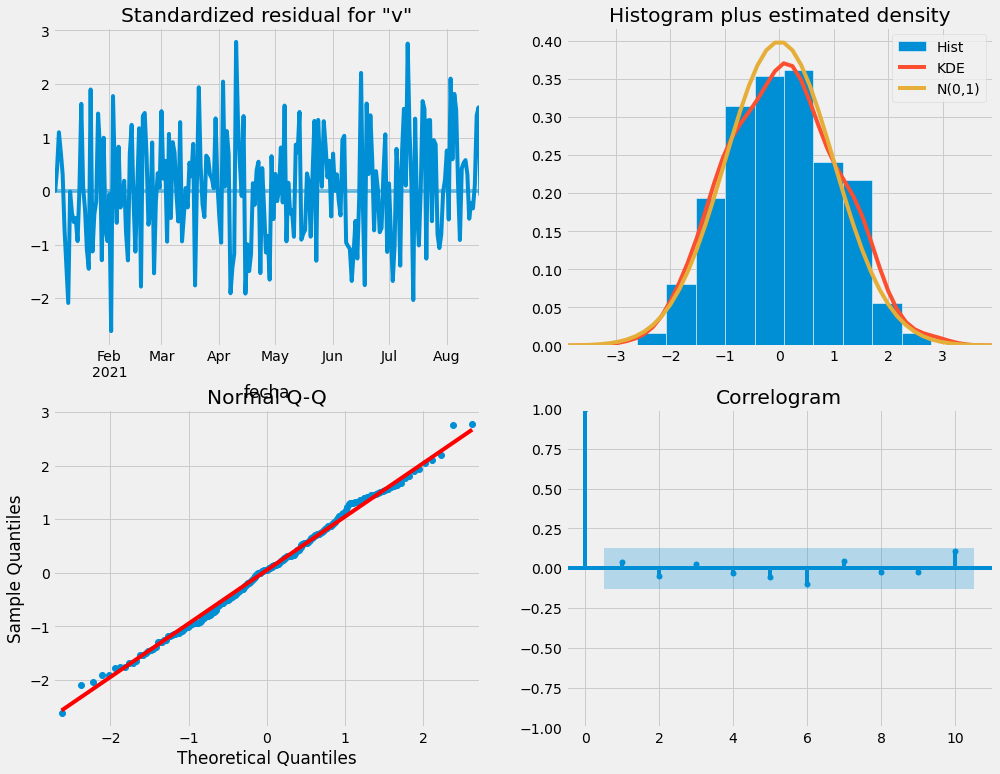

In [82]:
Boton_auxiliar("resid")
modelo2_3.plot_diagnostics(figsize=(15,12))
plt.show()

Inicialmente vemos un muy buen comportamiento de los residuales, donde en vista de los gráficos, parecen los residuales distribuirse normal como los muestra tanto el Q_Q plot y el histrograma de la densidad esperada con la teórica de los residuales, además no estar correlacionado, oscilan alrededor del cero con varianza constante (Dependiendo de la exigencia del mismo) aspecto que examinaremos a continuación.

Bajo las siguientes Hipótesis para el test **Ljung-Box**:
$$H_0:Autocorrelación~nula~~VS~~Ha:Existe~Autocorrelación$$
y con el Test de **Jarque-Bera**:
$$H_0:Existe~Normalidad~~VS~~Ha:No~existe~Normalidad$$

In [85]:
Boton_auxiliar("resid1")
modelo2_3.summary().tables[2]

Ver código

Ljung-Box (L1) (Q):,0.33,Jarque-Bera (JB):,1.59
Prob(Q):,0.56,Prob(JB):,0.45
Heteroskedasticity (H):,1.21,Skew:,0.07
Prob(H) (two-sided):,0.40,Kurtosis:,2.62


Finalmente concluimos que frente al criterio de desición obtenido por el valor-P a un nivel de significancia del 5% que  corroboran que los residuales son no correlacionados y tienen distribución normal no rechazando en ambas la hipótesis nula($H_0$).

## Analisis serie 2:<a id="seis2"></a>

Primero se examinara el grafico de diagnostico para examinar la información que se tiene acerca de la serie:

Ver código

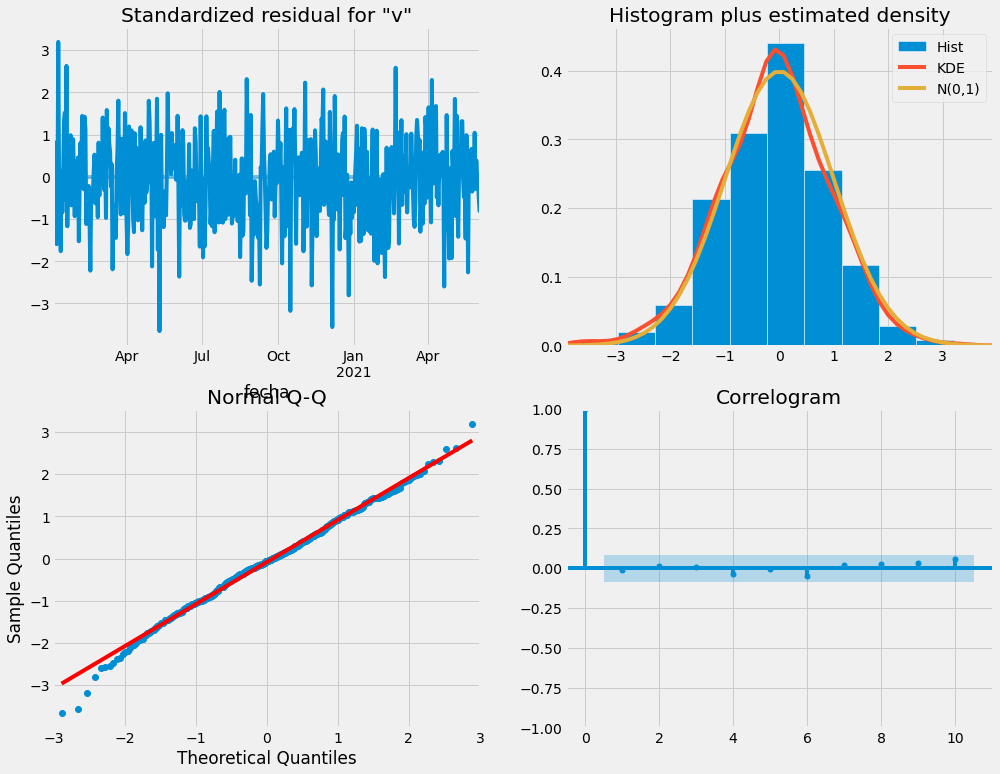

In [86]:
Boton_auxiliar("resid3")
modelo3_3.plot_diagnostics(figsize=(15,12))
plt.show()

En este de igual manera se ve un muy buen comportamiento de los residuales, donde en vista de los gráficos, parecen los residuales distribuirse normal como los muestra tanto el Q_Q plot y el histrograma de la densidad esperada con la teórica de los residuales, además de no estar correlacionado, oscilan alrededor del cero con varianza constante (Dependiendo de la exigencia del mismo) aspecto que examinaremos a continuación.

Bajo las siguientes Hipótesis para el test **Ljung-Box**:
$$H_0:Autocorrelación~nula~~VS~~Ha:Existe~Autocorrelación$$
y con el Test de **Jarque-Bera**:
$$H_0:Existe~Normalidad~~VS~~Ha:No~existe~Normalidad$$

In [100]:
Boton_auxiliar("resid4")
modelo3_3.summary().tables[2]

Ver código

Ljung-Box (L1) (Q):,0.08,Jarque-Bera (JB):,7.23
Prob(Q):,0.77,Prob(JB):,0.03
Heteroskedasticity (H):,0.97,Skew:,-0.17
Prob(H) (two-sided):,0.86,Kurtosis:,3.47


Finalmente concluimos que frente al criterio de desición obtenido por el valor-P a un nivel de significancia del 5% que  corroboran que los residuales son no correlacionados más sin embargo rechazamos la hipótesis nula y aceptamos la alternativa para el Test de **Jarque-Bera** lo cuál nos habla de que los residuales no se distribuyen normal.

## Analisis serie 3:<a id="seis3"></a>

Primero se examinara el grafico de diagnostico para examinar la información que se tiene acerca de la serie:

Ver código

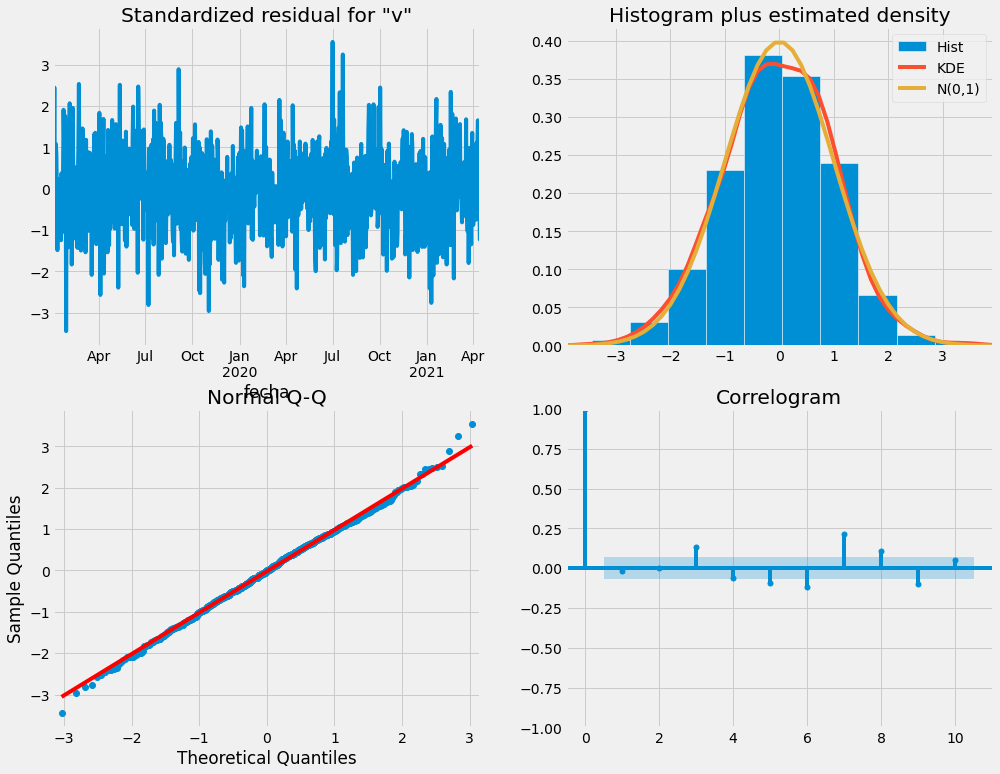

In [94]:
Boton_auxiliar("resid67")
modelo4_4.plot_diagnostics(figsize=(15,12))
plt.show()

En este se ve un comportamiento de los residuales muy deficientes, donde en vista de los gráficos, parecen que los residuales no parecen que pueden distribuir de manera normal como los muestra tanto el Q_Q plot y el histrograma de la densidad esperada con la teórica de los residuales, además de parecer estar correlacionado, oscilan alrededor del cero mas no parecieran tener varianza constante (Dependiendo de la exigencia del mismo) aspecto que examinaremos a continuación.

Bajo las siguientes Hipótesis para el test **Ljung-Box**:
$$H_0:Autocorrelación~nula~~VS~~Ha:Existe~Autocorrelación$$
y con el Test de **Jarque-Bera**:
$$H_0:Existe~Normalidad~~VS~~Ha:No~existe~Normalidad$$

In [93]:
Boton_auxiliar("resid6")
modelo4_4.summary().tables[2]

Ver código

Ljung-Box (L1) (Q):,0.34,Jarque-Bera (JB):,0.84
Prob(Q):,0.56,Prob(JB):,0.66
Heteroskedasticity (H):,0.92,Skew:,-0.05
Prob(H) (two-sided):,0.47,Kurtosis:,3.11


Finalmente concluimos que frente al criterio de desición obtenido por el valor-P a un nivel de significancia del 5% que  corroboran que los residuales son no correlacionados y tienen distribución normal no rechazando en ambas la hipótesis nula($H_0$).

# Solución literal 7<a id="siete"></a>

Gran Parte del punto ya se menciono en el punto [Solución literal 6](#seis) para cada serie se hizo este análisis tomando el **Test Jarque-Bera** a continuación solo se mostrara En resumén los resultados obtenidos para cada una de las series:
- **Interpretación serie 1:** Aceptamos la hipótesis nula de normalidad($H_0$) tomando como críterio el valor_p obtenido de 0.45, para mas información [Análisis serie 1](#seis1).
- **Interpretación serie 2:** Rechazamos la hipótesis nula de normalidad($H_0$) tomando como críterio el valor_p obtenido de 0.03, para mas información [Análisis serie 2](#seis1).
- **Interpretación serie 3:** Aceptamos la hipótesis nula de normalidad($H_0$) tomando como críterio el valor_p obtenido de 0.66, para mas información [Análisis serie 3](#seis1).

# Solución literal 8<a id="ocho"></a>

A continuación se hace un análisis para predecir valores a futuro de las tres series y al final se ilustrara como se vera la serie para cada uno de los modelos anteriormente propuestos:

In [193]:
Boton_auxiliar("resid129")
fore = modelo2_3.get_forecast(6) 
fore_ci = fore.conf_int()
fore_ci["medias"]=fore.predicted_mean
fore1= modelo3_3.get_forecast(6) 
fore_ci1 = fore1.conf_int()
fore_ci1["medias"]=fore1.predicted_mean
fore2= modelo4_4.get_forecast(6) 
fore_ci2= fore2.conf_int()
fore_ci2["medias"]=fore2.predicted_mean
salidas([fore_ci,fore_ci1,fore_ci2], ['Predicciones serie 1:', 'Predicciones serie 2:',"Predicciones serie 3:"])

Ver código

,lower valor,upper valor,medias
2021-08-20,20.166778,24.047314,22.107046
2021-08-21,17.384726,25.891270,21.637998
2021-08-22,16.411976,27.845631,22.128804
2021-08-23,16.336441,29.274568,22.805504
2021-08-24,15.682681,29.954566,22.818624
2021-08-25,14.391686,30.480660,22.436173
,lower valor,upper valor,medias
2021-06-05,-95.917309,-92.057048,-93.987178
2021-06-06,-97.244069,-92.569175,-94.906622
2021-06-07,-98.282852,-91.124459,-94.703655


Vemos que siguen en general un comportamiento similar para cada una de las series, para mejor visualización de la información basta con simplemente entender las siguientes graficas.

## Ilustración serie 1<a id="ocho1"></a>

A continuación se logra ver los resultado visualmente de la serie 1

Ver código

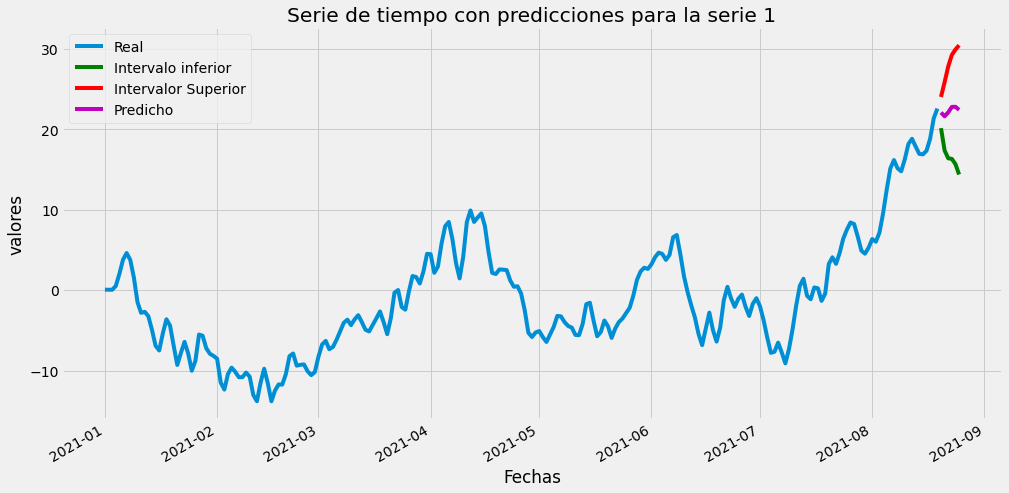

In [192]:
Boton_auxiliar("resid9")
plt.figure(figsize=[15, 8])  #  Graficamos:
plt.plot(serie_1)
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="red")
fore_ci.iloc[:,2].plot(color="m")
plt.legend(["Real", "Intervalo inferior","Intervalor Superior","Predicho"])
plt.title("Serie de tiempo con predicciones para la serie 1")
plt.xlabel("Fechas")
plt.ylabel("valores")
plt.show()

Vemos que están muy relacionados la información obtenida con la serie, en teoria esperamos que para las 6 fechas siguientes al **2021-07-20** los valores obtenidos para la serie 1 esten en el intervalo de confianza ilustrado tanto en la tablas como visualmente en la gráfica, lo anterior a un 95% confianza.

## Ilustración serie 2<a id="ocho2"></a>

A continuación se ve los gráficos de la serie 2 junto a sus predicciones

Ver código

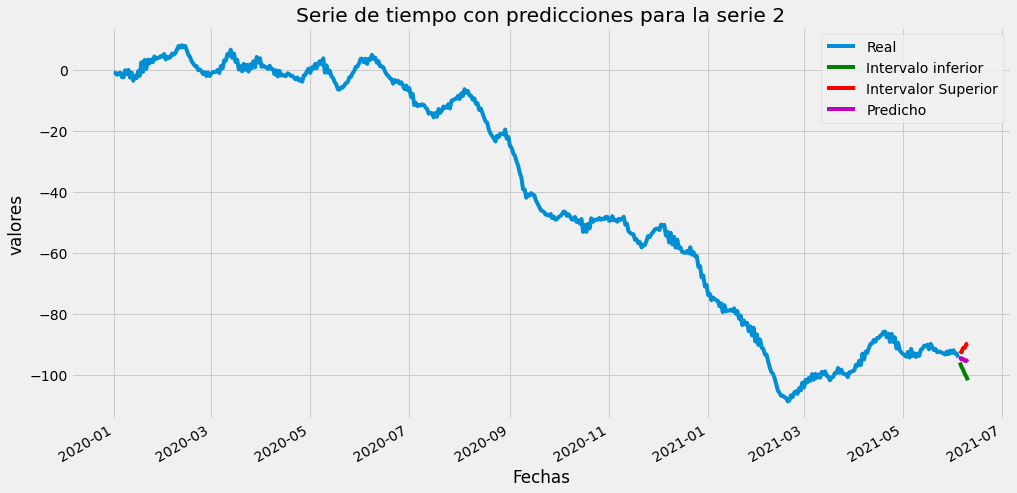

In [199]:
Boton_auxiliar("resid9123")
plt.figure(figsize=[15, 8])  #  Graficamos:
plt.plot(serie_2)
fore_ci1.iloc[:,0].plot(color="green")
fore_ci1.iloc[:,1].plot(color="red")
fore_ci1.iloc[:,2].plot(color="m")
plt.legend(["Real", "Intervalo inferior","Intervalor Superior","Predicho"])
plt.title("Serie de tiempo con predicciones para la serie 2")
plt.xlabel("Fechas")
plt.ylabel("valores")
plt.show()

Vemos que están muy relacionados la información obtenida con la serie, en teoria esperamos que para las 6 fechas siguientes al **2021-06-05** los valores obtenidos para la serie 2 esten en el intervalo de confianza ilustrado tanto en la tablas como visualmente en la gráfica, lo anterior a un 95% confianza.

## Ilustración series 3<a id="ocho3"></a>

A continuación se ve los gráficos de la serie 3 junto a sus predicciones

Ver código

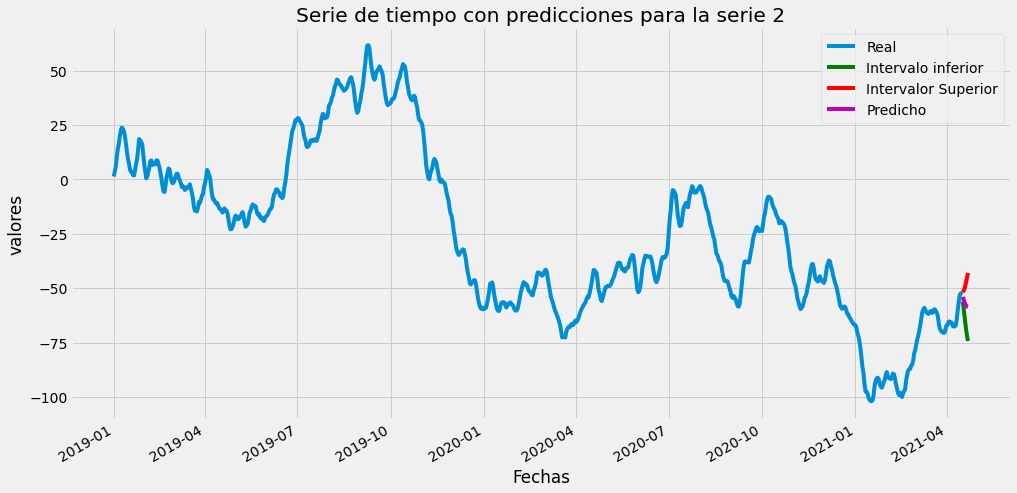

In [198]:
Boton_auxiliar("resid91")
plt.figure(figsize=[15, 8])  #  Graficamos:
plt.plot(serie_3)
fore_ci2.iloc[:,0].plot(color="green")
fore_ci2.iloc[:,1].plot(color="red")
fore_ci2.iloc[:,2].plot(color="m")
plt.legend(["Real", "Intervalo inferior","Intervalor Superior","Predicho"])
plt.title("Serie de tiempo con predicciones para la serie 2")
plt.xlabel("Fechas")
plt.ylabel("valores")
plt.show()

Vemos que están muy relacionados la información obtenida con la serie, en teoria esperamos que para las 6 fechas siguientes al **2021-03-17** los valores obtenidos para la serie 3 esten en el intervalo de confianza ilustrado tanto en la tablas como visualmente en la gráfica, lo anterior a un 95% confianza.

# Autores:<a id="autor"></a>

[Sebastián Restrepo Betancur](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01)

[Juan Camilo Ruiz Herrera/Universidad de Colombia](https://www.linkedin.com/in/saishruthi-swaminathan/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01)